# Cross tabs
Assess responses broken down by various demo cuts. Generally we want to report weighted means and uncertainties.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats import weightstats

In [2]:
# load data
data = pd.read_csv('../data/processed/weighted_survey_data.csv')

In [3]:
data['q05_city_direction_right'] = (data['q05_city_direction'] == 'right') * 1.0

First, we identify the quantities we want to analyze.

In [4]:
for c in data.columns:
    print(c)

year
q01_happy
q02_satisfied_general
q03_satisfied_somerville
q04_satisfied_neighborhood
q06a_city_services
q06b_cost_housing
q06c_quality_schools
q06d_trust_police
q06e_sidewalks
q06f_events
q09_safe_at_night
q11_beauty
q10_parks
d01_gender
d02_age
d04_race
d05_num_children
d06_housing_status
d07_plan_to_move
d10_how_long_lived_here
d08_hhi
d09_is_student
ward
q05_city_direction
q07_safe_crossing_street
q08_convenient
q12_housing_condition
move_why
d03_english
d03_spanish
d03_portuguese
d03_chinese
d03_other
d04_ethnicity
d04_race_white
d04_race_aa
d04_race_asian
d04_race_other
race_hooks
d08_hhi_buckets
d11_car
d11_walk
d11_bike
d11_public
d12_car
d12_walk
d12_bike
d12_public
weight
q05_city_direction_right


In [5]:
cols_to_analyze = ['q01_happy'
                   ,'q02_satisfied_general'
                   ,'q03_satisfied_somerville'
                   ,'q04_satisfied_neighborhood'
                   ,'q06a_city_services'
                   ,'q06b_cost_housing'
                   ,'q06c_quality_schools'
                   ,'q06d_trust_police'
                   ,'q06e_sidewalks'
                   ,'q06f_events'
                   ,'q09_safe_at_night'
                   ,'q11_beauty'
                   ,'q10_parks'
                   ,'q05_city_direction_right'
                   ,'q07_safe_crossing_street'
                   ,'q08_convenient'
                   ,'q12_housing_condition'
                   ,'d07_plan_to_move'
                  ]


breakdown_cols = ['d01_gender',
                  'race_hooks',
                  'd08_hhi',
                  'ward',
                  'd02_age',
                  'd05_num_children',
                  'd09_is_student',
                  'd06_housing_status'
                  ]

We want to transform these to "interesting" insights, e.g. by identifying trends among people who answered particularly high or low. So let's start by looking at the distributions.

When we actually present the distributions we'll want to do weighted percentages. This is just to find obvious breaks in responses.

array([[<AxesSubplot:title={'center':'q01_happy'}>,
        <AxesSubplot:title={'center':'q02_satisfied_general'}>,
        <AxesSubplot:title={'center':'q03_satisfied_somerville'}>,
        <AxesSubplot:title={'center':'q04_satisfied_neighborhood'}>],
       [<AxesSubplot:title={'center':'q06a_city_services'}>,
        <AxesSubplot:title={'center':'q06b_cost_housing'}>,
        <AxesSubplot:title={'center':'q06c_quality_schools'}>,
        <AxesSubplot:title={'center':'q06d_trust_police'}>],
       [<AxesSubplot:title={'center':'q06e_sidewalks'}>,
        <AxesSubplot:title={'center':'q06f_events'}>,
        <AxesSubplot:title={'center':'q09_safe_at_night'}>,
        <AxesSubplot:title={'center':'q11_beauty'}>],
       [<AxesSubplot:title={'center':'q10_parks'}>,
        <AxesSubplot:title={'center':'q05_city_direction_right'}>,
        <AxesSubplot:title={'center':'q07_safe_crossing_street'}>,
        <AxesSubplot:title={'center':'q08_convenient'}>],
       [<AxesSubplot:title={'cent

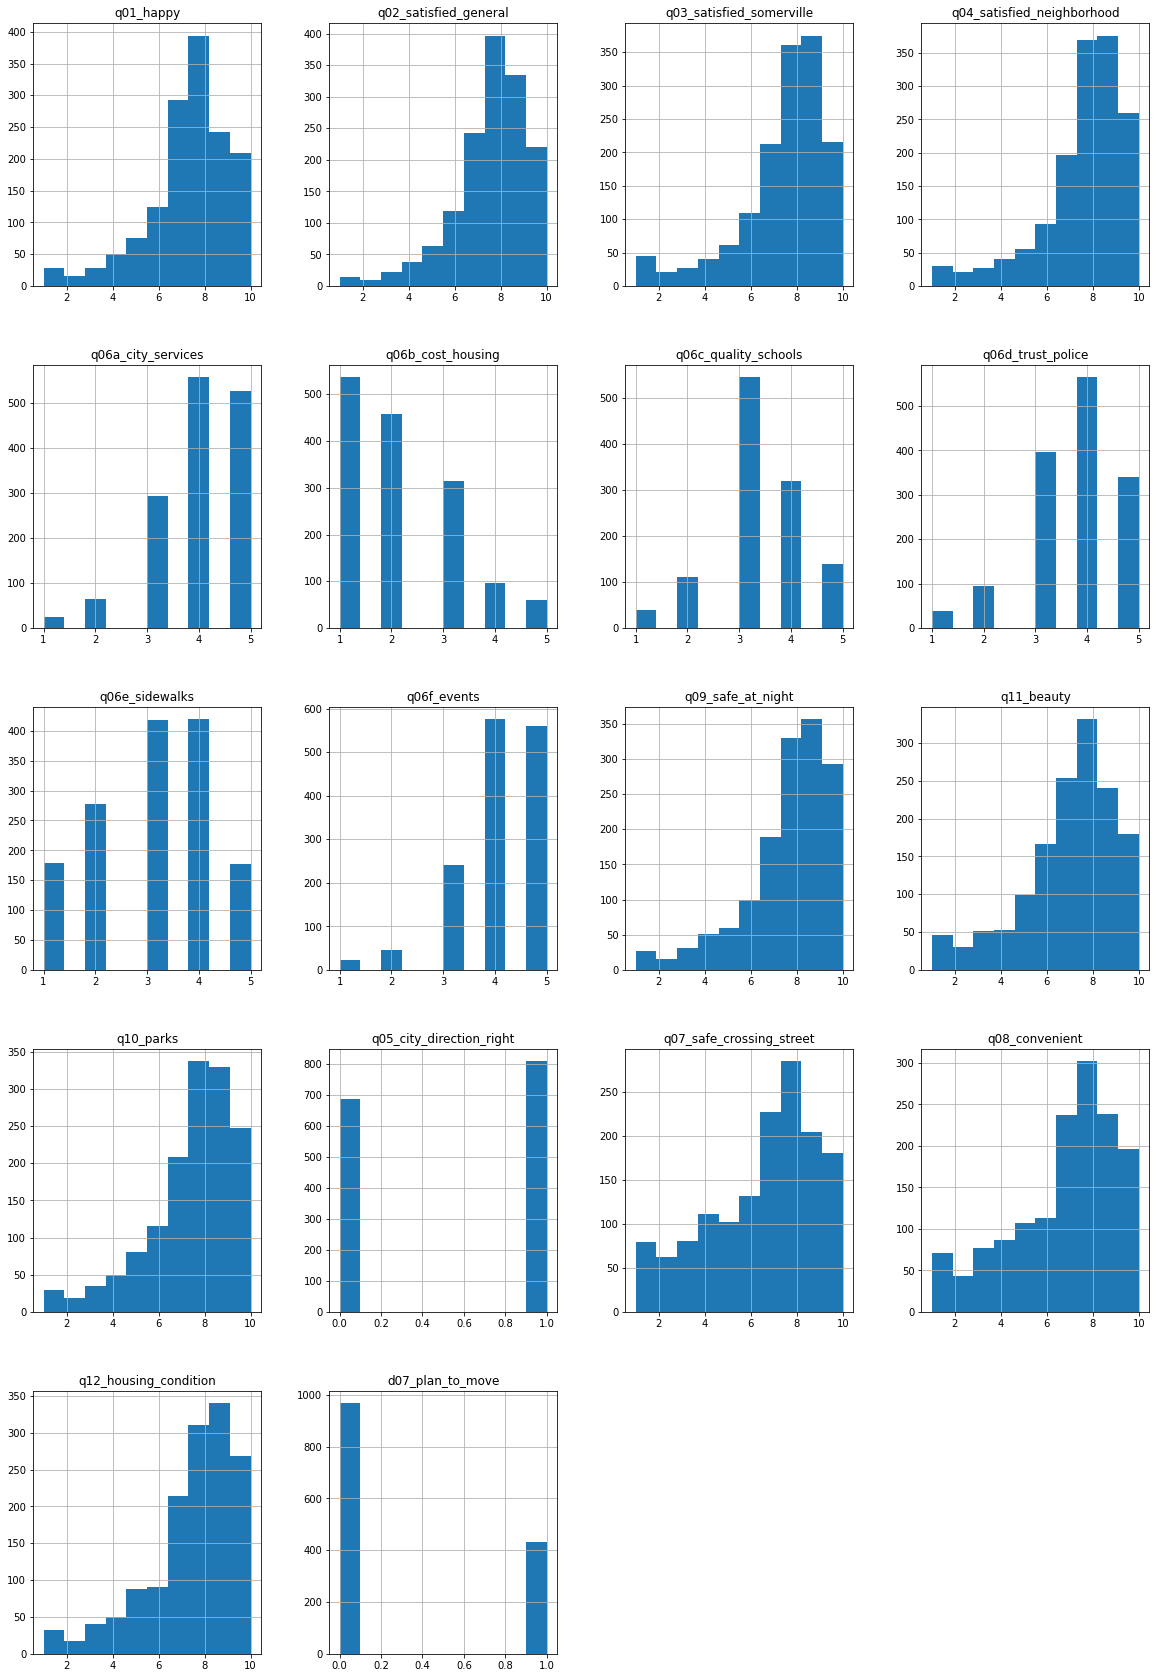

In [6]:
data[cols_to_analyze].hist(grid=True, figsize=(20,30))

Looks safe to do top-2-box for all of the 10-point likert scales.

The 5-point scales might be trickier. For example, the "housing cost" question is mostly left-skewed, while most others are right-skewed.

Maybe we do top 2 box and bottom 2 box.

In [7]:
top_2_cols = ['q01_happy'
              ,'q02_satisfied_general'
              ,'q03_satisfied_somerville'
              ,'q04_satisfied_neighborhood'
              ,'q11_beauty'
              ,'q10_parks'
              ,'q05_city_direction_right'
              ,'q07_safe_crossing_street'
              ,'q08_convenient'
              ,'q12_housing_condition']

for c in top_2_cols:
    data[c + '_top2'] = data[c] >= 9.0
    data[c + '_bot2'] = data[c] <= 2.0
    
    
top_1_cols = ['q06a_city_services'
              ,'q06b_cost_housing'
              ,'q06c_quality_schools'
              ,'q06d_trust_police'
              ,'q06e_sidewalks'
              ,'q06f_events'
             ]

for c in top_1_cols:
    data[c + '_top1'] = data[c] >= 5.0
    data[c + '_bot1'] = data[c] <= 1.0

In [8]:
val_cols = (cols_to_analyze 
          + [x + '_top2' for x in top_2_cols] 
          + [x + '_bot2' for x in top_2_cols] 
          + [x + '_top1' for x in top_1_cols]
          + [x + '_bot1' for x in top_1_cols])


Look at each value of interest broken down by each breakdown of interest.

In [9]:
def weighted_avg_with_nan(val, wgt):
    """Returns weighted average. Accepts missing values in weight or value arrays"""
    
    nan_mask = ~np.isnan(val)
    val_mask = val[nan_mask]
    wgt_mask = wgt[nan_mask]

    return np.sum(val_mask * wgt_mask) / np.sum(wgt_mask)

In [76]:
# weighted means

for v in val_cols:
    for b in breakdown_cols:
        print(v)
        print(data.groupby(b).apply(
            lambda g: weighted_avg_with_nan(g[v], g['weight'])))



q01_happy
d01_gender
Female       7.468667
Male         7.390853
No Answer    7.668596
Nonbinary    6.522984
dtype: float64
q01_happy
race_hooks
No Answer      7.033100
aa             7.637971
asian          7.775067
other          7.946177
two_or_more    6.972619
white          7.441862
dtype: float64
q01_happy
d08_hhi
$10,000 to $24,999      7.197395
$100,000 to $149,999    7.667282
$150,000 to 200,000     7.880598
$200,000 or more        7.840174
$25,000 to $49,999      6.785663
$50,000 to 74,999       7.292460
$75,000 to $99,999      7.453080
Less than $10,000       6.331771
dtype: float64
q01_happy
ward
0.0    9.000000
1.0    7.673398
2.0    7.462980
3.0    7.063008
4.0    7.060684
5.0    7.592493
6.0    7.524648
7.0    7.662416
dtype: float64
q01_happy
d02_age
17 Years           5.000000
18 to 24 Years     7.274387
25 to 34 Years     7.505365
35 to 44 Years     7.612785
45 to 54 Years     7.504533
55 to 64 Years     7.149760
65 to 74 Years     7.216244
75 Years & Over    7.742664

/tmp/ipykernel_3071/593397837.py:8: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(val_mask * wgt_mask) / np.sum(wgt_mask)


d02_age
17 Years           2.000000
18 to 24 Years     3.162923
25 to 34 Years     3.147878
35 to 44 Years     3.068244
45 to 54 Years     3.092058
55 to 64 Years     3.174082
65 to 74 Years     3.163101
75 Years & Over    2.995945
dtype: float64
q06e_sidewalks
d05_num_children
0.0    3.143370
1.0    3.013317
dtype: float64
q06e_sidewalks
d09_is_student
0.0    3.161113
1.0    2.701291
dtype: float64
q06e_sidewalks
d06_housing_status
Other    3.185916
Own      2.980520
Rent     3.190603
dtype: float64
q06f_events
d01_gender
Female       4.138941
Male         4.048038
No Answer    3.977175
Nonbinary    4.721860
dtype: float64
q06f_events
race_hooks
No Answer      3.686277
aa             3.576019
asian          3.973409
other          4.156453
two_or_more    4.170246
white          4.167064
dtype: float64
q06f_events
d08_hhi
$10,000 to $24,999      4.017812
$100,000 to $149,999    4.208602
$150,000 to 200,000     4.182482
$200,000 or more        4.288116
$25,000 to $49,999      3.938350
$

race_hooks
No Answer      7.071245
aa             6.602453
asian          7.558434
other          7.437413
two_or_more    6.624775
white          6.885102
dtype: float64
q08_convenient
d08_hhi
$10,000 to $24,999      6.810550
$100,000 to $149,999    7.124348
$150,000 to 200,000     6.903407
$200,000 or more        7.152210
$25,000 to $49,999      6.868556
$50,000 to 74,999       7.079708
$75,000 to $99,999      6.718081
Less than $10,000       6.724433
dtype: float64
q08_convenient
ward
0.0    9.000000
1.0    6.892147
2.0    6.678993
3.0    6.438491
4.0    6.356566
5.0    7.039597
6.0    7.785049
7.0    7.271774
dtype: float64
q08_convenient
d02_age
17 Years           6.000000
18 to 24 Years     7.035585
25 to 34 Years     6.983243
35 to 44 Years     6.975341
45 to 54 Years     6.962318
55 to 64 Years     6.536028
65 to 74 Years     7.044487
75 Years & Over    6.884761
dtype: float64
q08_convenient
d05_num_children
0.0    6.953553
1.0    6.893624
dtype: float64
q08_convenient
d09_is_st

d08_hhi
$10,000 to $24,999      0.467862
$100,000 to $149,999    0.438085
$150,000 to 200,000     0.358351
$200,000 or more        0.365631
$25,000 to $49,999      0.442454
$50,000 to 74,999       0.416317
$75,000 to $99,999      0.341469
Less than $10,000       0.340700
dtype: float64
q10_parks_top2
ward
0.0    1.000000
1.0    0.346152
2.0    0.347335
3.0    0.340391
4.0    0.352747
5.0    0.423120
6.0    0.485130
7.0    0.445222
dtype: float64
q10_parks_top2
d02_age
17 Years           0.000000
18 to 24 Years     0.373243
25 to 34 Years     0.429910
35 to 44 Years     0.381050
45 to 54 Years     0.370079
55 to 64 Years     0.332870
65 to 74 Years     0.406928
75 Years & Over    0.424896
dtype: float64
q10_parks_top2
d05_num_children
0.0    0.398726
1.0    0.383706
dtype: float64
q10_parks_top2
d09_is_student
0.0    0.405770
1.0    0.341077
dtype: float64
q10_parks_top2
d06_housing_status
Other    0.297302
Own      0.366393
Rent     0.410916
dtype: float64
q05_city_direction_right_top2

d02_age
17 Years           0.000000
18 to 24 Years     0.000000
25 to 34 Years     0.011436
35 to 44 Years     0.042639
45 to 54 Years     0.014288
55 to 64 Years     0.056167
65 to 74 Years     0.053096
75 Years & Over    0.080789
dtype: float64
q04_satisfied_neighborhood_bot2
d05_num_children
0.0    0.026280
1.0    0.013282
dtype: float64
q04_satisfied_neighborhood_bot2
d09_is_student
0.0    0.026814
1.0    0.000000
dtype: float64
q04_satisfied_neighborhood_bot2
d06_housing_status
Other    0.000000
Own      0.029202
Rent     0.023630
dtype: float64
q11_beauty_bot2
d01_gender
Female       0.039411
Male         0.043406
No Answer    0.049770
Nonbinary    0.000000
dtype: float64
q11_beauty_bot2
race_hooks
No Answer      0.093928
aa             0.044054
asian          0.025993
other          0.000000
two_or_more    0.018644
white          0.037502
dtype: float64
q11_beauty_bot2
d08_hhi
$10,000 to $24,999      0.057950
$100,000 to $149,999    0.029295
$150,000 to 200,000     0.043780
$200

d08_hhi
$10,000 to $24,999      0.053073
$100,000 to $149,999    0.026683
$150,000 to 200,000     0.027488
$200,000 or more        0.024290
$25,000 to $49,999      0.055164
$50,000 to 74,999       0.020420
$75,000 to $99,999      0.020510
Less than $10,000       0.116104
dtype: float64
q06b_cost_housing_top1
ward
0.0    0.000000
1.0    0.059274
2.0    0.000000
3.0    0.028530
4.0    0.066098
5.0    0.012981
6.0    0.020684
7.0    0.080869
dtype: float64
q06b_cost_housing_top1
d02_age
17 Years           0.000000
18 to 24 Years     0.017518
25 to 34 Years     0.013511
35 to 44 Years     0.022317
45 to 54 Years     0.047223
55 to 64 Years     0.078096
65 to 74 Years     0.094289
75 Years & Over    0.097908
dtype: float64
q06b_cost_housing_top1
d05_num_children
0.0    0.031424
1.0    0.047887
dtype: float64
q06b_cost_housing_top1
d09_is_student
0.0    0.032602
1.0    0.005053
dtype: float64
q06b_cost_housing_top1
d06_housing_status
Other    0.019534
Own      0.050475
Rent     0.025631
dtyp

d02_age
17 Years           1.000000
18 to 24 Years     0.333632
25 to 34 Years     0.368670
35 to 44 Years     0.355390
45 to 54 Years     0.426646
55 to 64 Years     0.372116
65 to 74 Years     0.348962
75 Years & Over    0.343648
dtype: float64
q06b_cost_housing_bot1
d05_num_children
0.0    0.358298
1.0    0.415458
dtype: float64
q06b_cost_housing_bot1
d09_is_student
0.0    0.347498
1.0    0.527912
dtype: float64
q06b_cost_housing_bot1
d06_housing_status
Other    0.196170
Own      0.264151
Rent     0.430334
dtype: float64
q06c_quality_schools_bot1
d01_gender
Female       0.019759
Male         0.026207
No Answer    0.023816
Nonbinary    0.000000
dtype: float64
q06c_quality_schools_bot1
race_hooks
No Answer      0.065679
aa             0.053152
asian          0.000000
other          0.000000
two_or_more    0.000000
white          0.019779
dtype: float64
q06c_quality_schools_bot1
d08_hhi
$10,000 to $24,999      0.039025
$100,000 to $149,999    0.002017
$150,000 to 200,000     0.018024
$